In [72]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score , recall_score , f1_score,precision_score
from sklearn.metrics  import confusion_matrix,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer



In [73]:
#Reading the Dataset
false = pd.read_csv("Fake.csv")
true = pd.read_csv("true.csv")
new = pd.read_csv("csv/fake_or_real_news.csv")
new_true = pd.read_csv("csv/True.csv")
new1 = pd.read_csv("csv/news_articles.csv")
new2 = pd.read_csv("csv/news_dataset.csv")

In [74]:
new1

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


In [75]:
new2

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,FAKE,The Bengaluru City Police’s official Twitter h...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


In [76]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [77]:
new.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [78]:
new_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [79]:
#colum category for fake , true news
true['category'] = 1
false['category'] = 0
true['title'].shape[0]


new['category'] = np.where(new['label']=='FAKE', 0,1)


In [80]:
new1['category'] = np.where(new1['label']=='Fake', 0,1)

del new1['author']
del new1['published']
del new1['title']
del new1['language']
del new1['site_url']
del new1['main_img_url']
del new1['type']
del new1['title_without_stopwords']
del new1['text']
del new1['hasImage']
new1

,label,text_without_stopwords,category
0,Real,print pay back money plus interest entire fami...,1
1,Real,attorney general loretta lynch plead fifth bar...,1
2,Real,red state fox news sunday reported morning ant...,1
3,Real,email kayla mueller prisoner tortured isis cha...,1
4,Real,email healthcare reform make america great sin...,1
...,...,...,...
2091,Real,NaN,1
2092,Real,NaN,1
2093,Fake,NaN,0
2094,Fake,NaN,0


In [81]:
new1 = new1.dropna()
del new1['label']
new1 = new1.rename(columns={"text_without_stopwords": "text"})
new1

,text,category
0,print pay back money plus interest entire fami...,1
1,attorney general loretta lynch plead fifth bar...,1
2,red state fox news sunday reported morning ant...,1
3,email kayla mueller prisoner tortured isis cha...,1
4,email healthcare reform make america great sin...,1
...,...,...
2041,check hillarythemed haunted house anticlinton ...,1
2042,good samaritan wearing indian headdress disarm...,1
2043,skype sex scam fortune built shame moroccan bo...,1
2044,posted eddie skyhigh potency may scare away cr...,1


In [82]:
new2['category'] = np.where(new2['label']=='FAKE', 0,1)
del new2['label']
new2

,text,category
0,Payal has accused filmmaker Anurag Kashyap of ...,1
1,A four-minute-long video of a woman criticisin...,0
2,"Republic Poll, a fake Twitter account imitatin...",0
3,"Delhi teen finds place on UN green list, turns...",1
4,Delhi: A high-level meeting underway at reside...,1
...,...,...
3724,19:17 (IST) Sep 20\n\nThe second round of coun...,1
3725,19:17 (IST) Sep 20\n\nThe second round of coun...,1
3726,The Bengaluru City Police’s official Twitter h...,0
3727,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\...",1


In [83]:
df3 = pd.concat([new1,new2])
df3

,text,category
0,print pay back money plus interest entire fami...,1
1,attorney general loretta lynch plead fifth bar...,1
2,red state fox news sunday reported morning ant...,1
3,email kayla mueller prisoner tortured isis cha...,1
4,email healthcare reform make america great sin...,1
...,...,...
3724,19:17 (IST) Sep 20\n\nThe second round of coun...,1
3725,19:17 (IST) Sep 20\n\nThe second round of coun...,1
3726,The Bengaluru City Police’s official Twitter h...,0
3727,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\...",1


In [84]:
del new['title']
del new['Unnamed: 0']
del new['label']
new

,text,category
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1
...,...,...
6330,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [85]:
df1 = pd.concat([true,false])
#รวมไฟล์2ไฟล์
df1


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [86]:
#ลบcolumที่ไม่จำเป็น
#df['text'] = df['text'] + " " + df['title']
del df1['title']
del df1['subject']
del df1['date']
df1


,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [87]:
df = pd.concat([df1,new])
df = pd.concat([df,new1])
df = pd.concat([df,new2])
te = df


In [88]:
df

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
3724,19:17 (IST) Sep 20\n\nThe second round of coun...,1
3725,19:17 (IST) Sep 20\n\nThe second round of coun...,1
3726,The Bengaluru City Police’s official Twitter h...,0
3727,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\...",1


In [89]:
#stop = set(stopwords.words('english'))
#punctuation = list(string.punctuation)
#stop.update(punctuation)

In [90]:
#Data Cleaning def
def wordopt(text):
    text= str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return(text)

In [91]:
#uese Data Cleaning
df['text'] = df['text'].apply(wordopt)
print(df['text'])

0       washington  reuters    the head of a conservat...
1       washington  reuters    transgender people will...
2       washington  reuters    the special counsel inv...
3       washington  reuters    trump campaign adviser ...
4       seattle washington  reuters    president donal...
                              ...                        
3724       ist  sep   the second round of countrywide ...
3725       ist  sep   the second round of countrywide ...
3726    the bengaluru city police s official twitter h...
3727    sep       ist  source  toi in  meet neelkantha...
3728    read also  read also  advocate ishkaran bhanda...
Name: text, Length: 57008, dtype: object


In [92]:
#กำหนดตัวทดสอบ กับ เฉลย
x = df['text']
y = df['category']

In [93]:
df

,text,category
0,washington reuters the head of a conservat...,1
1,washington reuters transgender people will...,1
2,washington reuters the special counsel inv...,1
3,washington reuters trump campaign adviser ...,1
4,seattle washington reuters president donal...,1
...,...,...
3724,ist sep the second round of countrywide ...,1
3725,ist sep the second round of countrywide ...,1
3726,the bengaluru city police s official twitter h...,0
3727,sep ist source toi in meet neelkantha...,1


In [94]:
#text to Matrix and split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
vec_train = CountVectorizer().fit(x_train)
X_vec_train = vec_train.transform(x_train)
X_vec_test = vec_train.transform(x_test)

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_vec_train)
X_test_tfidf = tfidf_transformer.fit_transform(X_vec_test)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
LG = LogisticRegression(C=2,max_iter=5000)
LG.fit(X_vec_train, y_train)
LGpredicted_value = LG.predict(X_vec_test)
print("Accuracy score: ",accuracy_score(y_test, LGpredicted_value))


Accuracy score:  0.9563234520259604


Accuracy score:  0.9563234520259604
precision score:  0.960643330179754
f1 score:  0.9532482162974089
Recall score:  0.9459660890627911


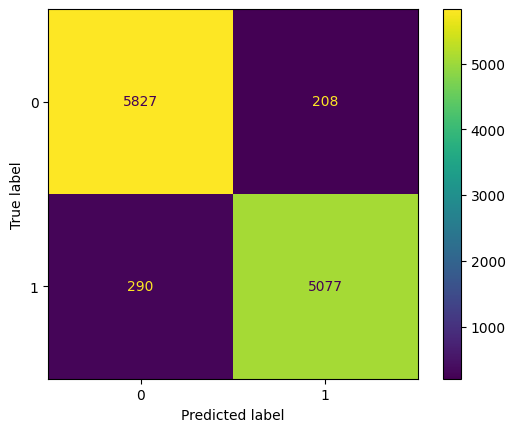

In [97]:
print("Accuracy score: ",accuracy_score(y_test, LGpredicted_value))
print("precision score: ",precision_score(y_test, LGpredicted_value))
print("f1 score: ",f1_score(y_test, LGpredicted_value))
print("Recall score: ",recall_score(y_test, LGpredicted_value))
cm = confusion_matrix(y_test, LGpredicted_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LG.classes_)
disp.plot()
plt.show()



Accuracy score:  0.781266444483424
precision score:  0.9822087948976167
f1 score:  0.7011742151929068
Recall score:  0.5451835289733556


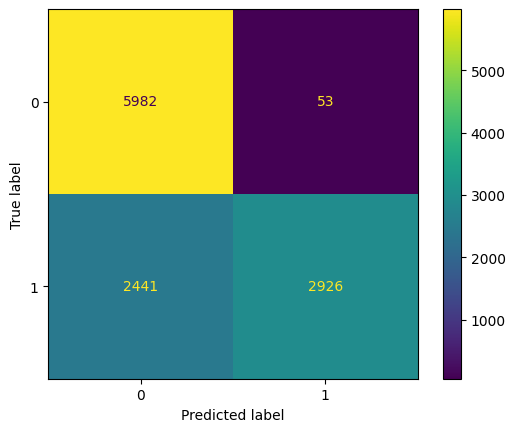

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
Rd1 = RandomForestClassifier(max_depth=2, random_state=0)
Rd1.fit(X_vec_train, y_train)
Rd1predicted_value = Rd1.predict(X_vec_test)
print("Accuracy score: ",accuracy_score(y_test, Rd1predicted_value))
print("precision score: ",precision_score(y_test, Rd1predicted_value))
print("f1 score: ",f1_score(y_test, Rd1predicted_value))
print("Recall score: ",recall_score(y_test, Rd1predicted_value))
cm = confusion_matrix(y_test, Rd1predicted_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rd1.classes_)
disp.plot()
plt.show()


In [99]:
print(len(x))
print(len(y))

57008
57008


Accuracy score:  0.951850552534643
precision score:  0.9659574468085106
f1 score:  0.9478978836480972
Recall score:  0.9305012111049004


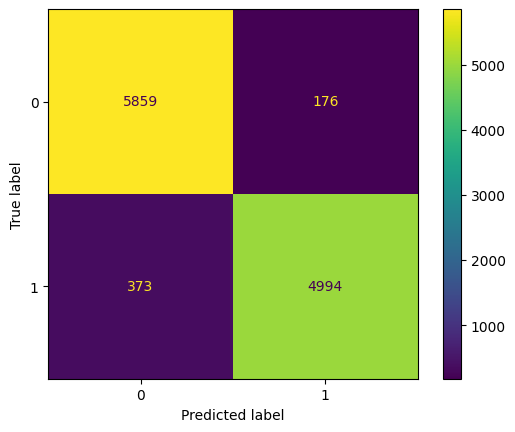

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=1, random_state=0)
GB.fit(X_vec_train, y_train)
GBpredicted_value = GB.predict(X_vec_test)
y_pred = GB.predict(X_vec_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print("precision score: ",precision_score(y_test, y_pred))
print("f1 score: ",f1_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GB.classes_)
disp.plot()
plt.show()


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# transforming
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

Accuracy score:  0.9551833011752324
precision score:  0.9651340996168583
f1 score:  0.9517332577689619
Recall score:  0.9386994596608906


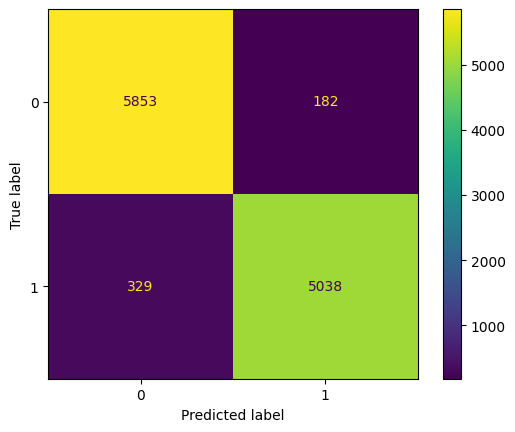

In [102]:
LGtf = LogisticRegression(C=2,max_iter=5000)
LGtf.fit(tfidf_train, y_train)
LGtfpredicted_value = LGtf.predict(tfidf_test)
print("Accuracy score: ",accuracy_score(y_test, LGtfpredicted_value))
print("precision score: ",precision_score(y_test, LGtfpredicted_value))
print("f1 score: ",f1_score(y_test, LGtfpredicted_value))
print("Recall score: ",recall_score(y_test, LGtfpredicted_value))
cm = confusion_matrix(y_test, LGtfpredicted_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LGtf.classes_)
disp.plot()
plt.show()


Accuracy score:  0.7949482546921592
precision score:  0.9812519860184302
f1 score:  0.7253934695795161
Recall score:  0.5753679895658654


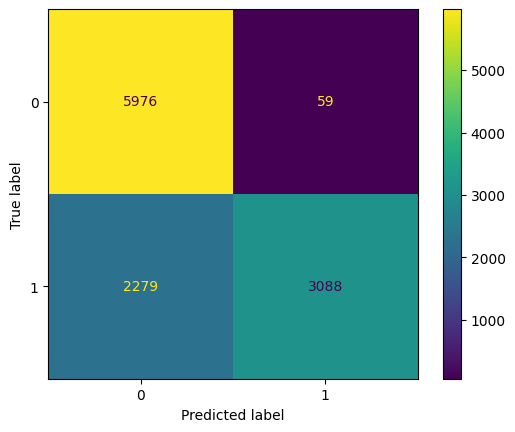

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
Rd = RandomForestClassifier(max_depth=2, random_state=0)
Rd.fit(tfidf_train, y_train)
Rdpredicted_value = Rd.predict(tfidf_test)
print("Accuracy score: ",accuracy_score(y_test, Rdpredicted_value))
print("precision score: ",precision_score(y_test, Rdpredicted_value))
print("f1 score: ",f1_score(y_test, Rdpredicted_value))
print("Recall score: ",recall_score(y_test, Rdpredicted_value))
cm = confusion_matrix(y_test, Rdpredicted_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rd.classes_)
disp.plot()
plt.show()


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GB.fit(tfidf_train, y_train)
GBpredicted_value = GB.predict(tfidf_test)
y_pred = GB.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print("precision score: ",precision_score(y_test, y_pred))
print("f1 score: ",f1_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GB.classes_)
disp.plot()
plt.show()


KeyboardInterrupt: 

In [106]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download NLTK tokenizer data if not already done


# Tokenize the sentences
te['token'] = [word_tokenize(sentence.lower()) for sentence in te['text']]

# Train the Word2Vec model
model = Word2Vec(sentences=te['token'], vector_size=100, window=5, min_count=1, sg=1)

# Save the model
model.save("word2vec_example.model")

# Load the model
# model = Word2Vec.load("word2vec_example.model")

# Find similar words
similar_words = model.wv.most_similar('a')
print("Words similar :", similar_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peear\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words similar : [('the', 0.732946515083313), ('this', 0.6816558241844177), ('another', 0.6695414185523987), ('dashboard', 0.6586147546768188), ('duffel', 0.6518626809120178), ('sehri', 0.649527370929718), ('cavity', 0.6347100138664246), ('was', 0.6331400275230408), ('is', 0.6263569593429565), ('zoomed', 0.6251831650733948)]


In [107]:
embedded_data = []
for text in te['token']:
    
    
    # Initialize an empty list to store word embeddings
    embeddings = []
    
    for word in text:
        if word in model.wv:
            embedding = model.wv[word]
            embeddings.append(embedding)
    
    # Calculate the sentence embedding by averaging word vectors
    if embeddings:
        sentence_embedding = np.mean(embeddings, axis=0)
        embedded_data.append(sentence_embedding)
    else:
        # Handle out-of-vocabulary words or empty text as needed
        embedded_data.append(None)

# Add the embedded data as a new column in the DataFrame
te['embed'] = embedded_data

In [108]:
print("Number of samples in y:", len(y))
te = te.dropna()
te

Number of samples in y: 57008


,text,category,token,embed
0,washington reuters the head of a conservat...,1,"[washington, reuters, the, head, of, a, conser...","[-0.19838282, 0.2643088, 0.09618166, 0.1598789..."
1,washington reuters transgender people will...,1,"[washington, reuters, transgender, people, wil...","[-0.17851572, 0.26988602, 0.104339205, 0.18395..."
2,washington reuters the special counsel inv...,1,"[washington, reuters, the, special, counsel, i...","[-0.15873188, 0.27675462, 0.07358588, 0.140205..."
3,washington reuters trump campaign adviser ...,1,"[washington, reuters, trump, campaign, adviser...","[-0.17592598, 0.31983885, 0.07118056, 0.131430..."
4,seattle washington reuters president donal...,1,"[seattle, washington, reuters, president, dona...","[-0.21400222, 0.26349354, 0.07655491, 0.070570..."
...,...,...,...,...
3724,ist sep the second round of countrywide ...,1,"[ist, sep, the, second, round, of, countrywide...","[-0.14526659, 0.49072963, 0.034353532, 0.19641..."
3725,ist sep the second round of countrywide ...,1,"[ist, sep, the, second, round, of, countrywide...","[-0.14526659, 0.49072963, 0.034353532, 0.19641..."
3726,the bengaluru city police s official twitter h...,0,"[the, bengaluru, city, police, s, official, tw...","[-0.20066397, 0.36717644, 0.014686094, 0.15271..."
3727,sep ist source toi in meet neelkantha...,1,"[sep, ist, source, toi, in, meet, neelkantha, ...","[-0.20620513, 0.35000923, 0.11379354, 0.162397..."


Accuracy score:  0.9117264229085316
precision score:  0.9090126644534612
f1 score:  0.9083425482245976
Recall score:  0.9076734192756292


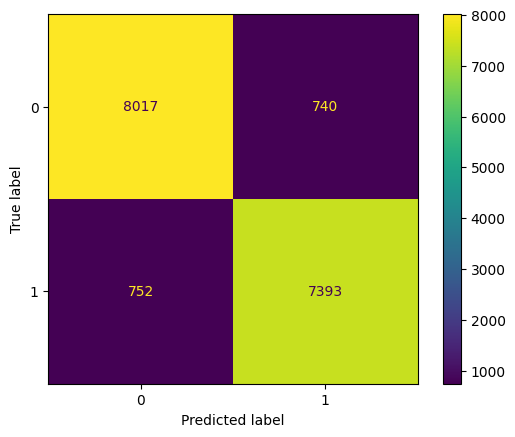

In [137]:
X_train, X_test, y_train, y_test = train_test_split(te['embed'].to_list(), te['category'], test_size=0.3,random_state=42)

l = LogisticRegression(C=25,max_iter=5000)
l.fit(X_train, y_train)

# Evaluate the model
y_pred = l.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print("precision score: ",precision_score(y_test, y_pred))
print("f1 score: ",f1_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l.classes_)
disp.plot()
plt.show()





Accuracy score:  0.9026742397349427
precision score:  0.8969223253541768
f1 score:  0.8992836588501807
Recall score:  0.901657458563536


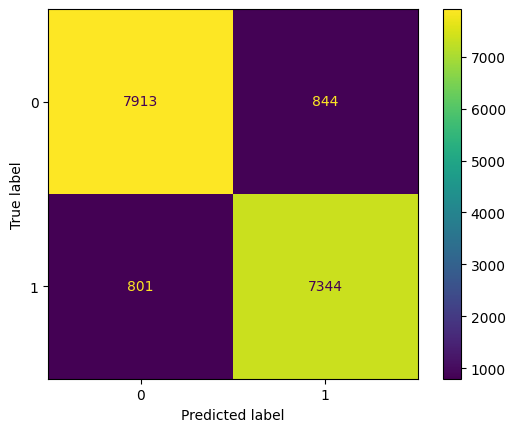

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GBpredicted_value = GB.predict(X_test)
y_pred = GB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print("precision score: ",precision_score(y_test, y_pred))
print("f1 score: ",f1_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GB.classes_)
disp.plot()
plt.show()


Accuracy score:  0.9203644539107798
precision score:  0.9314633836781318
f1 score:  0.9160009985022467
Recall score:  0.9010435850214856


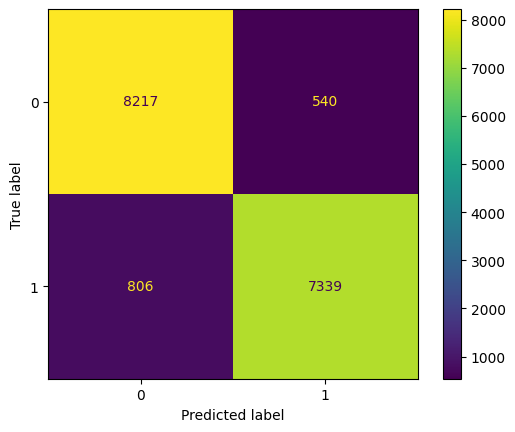

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Rd = RandomForestClassifier(max_depth=60, random_state=0)
Rd.fit(X_train, y_train)
Rdpredicted_value = Rd.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, Rdpredicted_value))
print("precision score: ",precision_score(y_test, Rdpredicted_value))
print("f1 score: ",f1_score(y_test, Rdpredicted_value))
print("Recall score: ",recall_score(y_test, Rdpredicted_value))
cm = confusion_matrix(y_test, Rdpredicted_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rd.classes_)
disp.plot()
plt.show()
